Generated data shape: (200, 2) (200,)


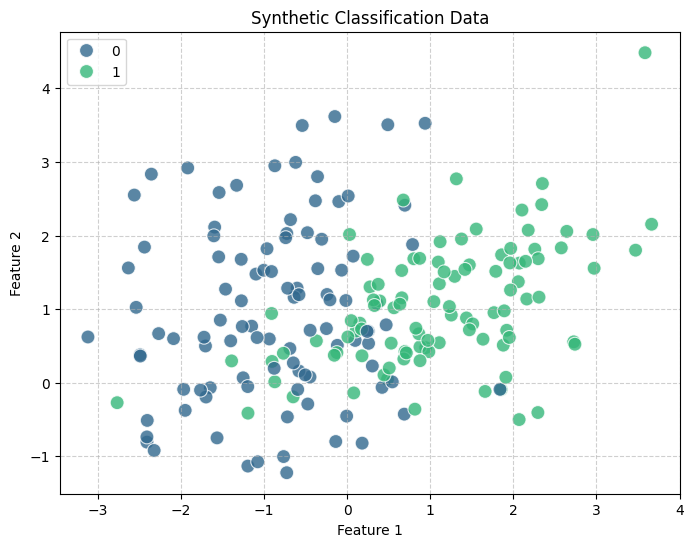

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate some synthetic data for classification
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

print("Generated data shape:", X.shape, y.shape)

# Visualize the generated data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8)
plt.title('Synthetic Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 140 samples
Test set size: 60 samples


In [ ]:
# 3. Initialize and train the KNN Classifier
# We'll choose k=5 (number of neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

print("KNN model trained successfully!")

KNN model trained successfully!


In [ ]:
# 4. Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# 5. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Visualize the decision boundary (optional, for 2D data)
def plot_decision_boundary(X, y, classifier, title):
    plt.figure(figsize=(10, 7))
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    sns.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', s=100, alpha=0.8, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_decision_boundary(X_test, y_test, knn_classifier, 'KNN Decision Boundary on Test Data')



Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        34
           1       0.73      0.85      0.79        26

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



AttributeError: module 'seaborn' has no attribute 'contourf'

<Figure size 1000x700 with 0 Axes>